<a href="https://colab.research.google.com/github/vs21542/CE888/blob/main/lab3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
from sklearn.model_selection import cross_val_score, ShuffleSplit, RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix,SCORERS
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split


* We have loaded the necessary libraries above
* Now let's load the data

In [29]:
df = pd.read_csv("bank-additional-full.csv", delimiter = ";")

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [30]:
df.shape

(41188, 21)

In [31]:
# convert a string variable to a categorical one
df[['y']] = df[['y']].apply(LabelEncoder().fit_transform)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Now let's prepare the data by cleaning it up and choosing the relevant column we would like to predict

In [32]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [33]:
df_dummies.drop(['duration'],inplace=True,axis=1)

In [34]:
df_dummies.isna().sum() # checking if there is any null values

age                     0
campaign                0
pdays                   0
previous                0
emp.var.rate            0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 63, dtype: int64

In [35]:
y = df_dummies['y']
X =df_dummies.drop(['y'],axis=1)

In [36]:
y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

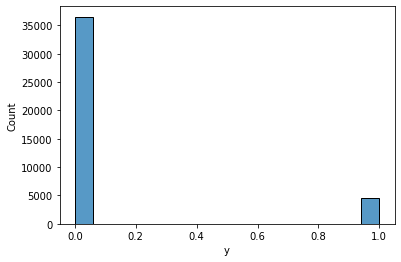

In [37]:
sns_plot = sns.histplot(y, kde=False)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.2,random_state=50)

In [39]:
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

As this is a imbalanced dataset we will use F1 Score

## 1. Dummy Classifier


In [60]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_scores = cross_val_score(dummy_clf,X_train, y_train, cv=10, scoring=make_scorer(f1_score))  # cross-validation
print("F1 Score is:" , (dummy_scores.mean()))

F1 Score is: 0.12260490086594629


## 2. Random Forest with CV=10

###  F1 Score



In [68]:
import sklearn.metrics as m
clf = RandomForestClassifier(n_estimators=100, max_depth=6,random_state=60)
clf.fit(X_train, y_train)
score = m.classification_report(y_test, clf.predict(X_test))
#scores = cross_val_score(clf,X_train, y_train, cv=10, scoring=make_scorer(f1_score))  # cross-validation
score

'              precision    recall  f1-score   support\n\n           0       0.91      0.99      0.95      7310\n           1       0.69      0.20      0.31       928\n\n    accuracy                           0.90      8238\n   macro avg       0.80      0.59      0.63      8238\nweighted avg       0.88      0.90      0.87      8238\n'

In [69]:

print(score)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.69      0.20      0.31       928

    accuracy                           0.90      8238
   macro avg       0.80      0.59      0.63      8238
weighted avg       0.88      0.90      0.87      8238



### Weighted F1 Score



In [64]:
clf_w = RandomForestClassifier(n_estimators=100, max_depth=8)
scores_w = cross_val_score(clf_w,X_train, y_train, cv=10, scoring=make_scorer(f1_score, average='weighted') ) # cross-validation
print("Weighted F1 Score is:" , (scores_w.mean()))

Weighted F1 Score is: 0.87340574363311


In [43]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test) # Accuracy

0.9017965525613013

Dummy classifier has F1 Score as 0.11


10 fold CV Random forest classifier has F1 score as 0.28

In [ ]:
print('Train Accuracy for KNN: ', rfc_gs.score(X_train, y_train))
print('Best Parameters:',rfc_gs.best_estimator_)

Train Accuracy for KNN:  0.9096813353566009
Best Parameters: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=95,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)


### Top 3 Features are :
Feature ranking:
1. euribor3m
2. nr.employed
3. pdays

In [70]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=60)
rfc.fit(X_train, y_train)

importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
features = X.columns
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))


[ 7  8  2 61  4  6  5  0  3  1 59 49 60 50 52 43 42 55 44 31 10 48 57 54
 23 38 36 22 58 14 56 33 28  9 30 53 17 39 41 18 27 34 25 21 32 45 16 51
 47 13 26 19 46 37 12 15 40 20 11 24 29 35]
Feature ranking:
1. euribor3m (0.151577)
2. nr.employed (0.134084)
3. pdays (0.080227)
4. poutcome_success (0.078047)
5. emp.var.rate (0.070825)
6. cons.conf.idx (0.068137)
7. cons.price.idx (0.048333)
8. age (0.047638)
9. previous (0.033972)
10. campaign (0.017042)
11. poutcome_failure (0.016215)
12. month_mar (0.015479)
13. poutcome_nonexistent (0.014994)
14. month_may (0.013652)
15. month_oct (0.013382)
16. contact_telephone (0.012663)
17. contact_cellular (0.012600)
18. day_of_week_mon (0.008250)
19. month_apr (0.007113)
20. education_university.degree (0.006552)
21. job_blue-collar (0.006280)
22. month_jun (0.005714)
23. day_of_week_tue (0.005641)
24. day_of_week_fri (0.005623)
25. marital_single (0.005510)
26. housing_yes (0.005335)
27. housing_no (0.005321)
28. marital_married (0.005246)
29. 

In [ ]:
rfc.score(X_test, y_test) 

0.9010682204418549

Now let's train the classifier on the whole dataset

In [71]:
def plot_confusion_matrix(conf_mat, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    conf_mat: confusion matrix
    classes: names of classes to be annotated
    normalize: [True/False] whether to normalise by column
    """
    if normalize:
        conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
        t = "(%.2f)" % (conf_mat[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Normalized confusion matrix


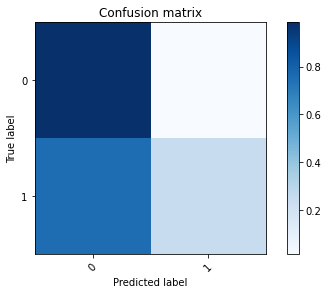

In [72]:
# Compute confusion matrix
y_pred = rfc.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize=True,
                      title='Confusion matrix')

#plt.savefig("confusion.pdf", bbox_inches='tight')

In [73]:
import pickle as pkl

outp = open('model.pkl', 'wb')
pkl.dump(rfc, outp, -1)  # where rfc is your classifier
outp.close()